In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

exp_path = '../cancer_data/2015_bulk_rna_seq.txt'
exp = pd.read_csv(exp_path, sep='\t', index_col=0)
exp.index = [i[:-3] for i in exp.index]

In [2]:
exp

,UBE2Q2P2,HMGB1P1,LOC155060,RNU12-2P,SSX9,EZHIP,EFCAB8,SRP14P1,LOC391343,TRIM75P,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,TPTEP1,AKR1C6P
TCGA-A1-A0SB,14.3935,116.3870,279.7612,0.4505,0.0,0.9010,0.9010,1.8020,0.0000,0.4505,...,95.9568,519.4279,1415.9252,19.3716,1364.5681,6186.7327,1931.2986,1436.1978,552.3144,0.0000
TCGA-A1-A0SD,11.3241,60.2630,83.6986,0.3308,0.0,0.6616,0.3308,4.6315,0.3308,0.3308,...,96.2700,578.2814,1225.7051,33.0825,868.0837,3559.6725,1278.9678,1195.6000,86.0144,0.0000
TCGA-A1-A0SE,4.4426,153.1452,74.7018,0.0000,0.0,0.0000,0.9872,5.5944,0.3291,0.3291,...,95.4340,726.6146,1018.8400,57.5895,960.5923,3007.8157,926.3677,1075.4422,866.1456,0.0000
TCGA-A1-A0SF,10.7401,141.1933,314.4482,0.0000,0.0,0.0000,2.9988,9.4249,0.0000,0.0000,...,74.1138,533.3625,1053.4444,94.6772,881.2262,5343.4779,934.3482,508.0867,52.2652,0.8568
TCGA-A1-A0SH,3.0048,79.8003,95.7054,0.0000,0.0,0.0000,0.3612,3.9727,0.0000,0.0000,...,87.7601,581.0946,801.3977,19.8634,1353.2389,5464.9614,1312.7898,1001.1151,455.7746,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-MS-A51U,7.9343,150.6834,540.4278,1.5649,0.0,0.5216,0.0000,6.2598,0.0000,0.0000,...,79.2906,443.9228,1083.4637,40.6886,858.1116,4930.6208,2212.8326,665.6234,249.8696,0.0000
TCGA-OL-A66H,2.2519,115.3378,338.1985,2.0851,0.0,0.0000,2.0851,4.1701,0.0000,0.0000,...,45.4545,747.7064,903.6697,10.4254,634.2786,4163.4696,1251.8766,773.1443,5.8382,0.0000
TCGA-OL-A66I,1.2603,158.3599,210.7460,0.4173,0.0,2.0866,2.5039,2.5039,0.4173,0.0000,...,61.3459,334.2723,933.1247,206.1555,479.0819,6621.1789,649.3479,780.3860,47.1570,0.0000
TCGA-OL-A66J,5.0428,124.6327,323.1185,0.4507,0.0,0.0000,8.1118,5.8585,3.1546,0.0000,...,45.5160,797.6566,1038.3055,13.9703,683.1906,5216.7643,1408.7427,713.3844,567.3727,0.0000


In [3]:
def umap_show(data):

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.T).T

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')
    plt.title('UMAP projection of gene expression data')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


In [4]:
def tsne_show(data):
    tsne = TSNE(n_components=2, random_state=42)
    embedding_tsne = tsne.fit_transform(data)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')
    plt.title('t-SNE projection of gene expression data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


In [5]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering(df):
    # 先对数据进行标准化
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    
    # 计算样本之间的距离矩阵
    distance_matrix = sch.distance.pdist(df_scaled, metric='euclidean')

    print(distance_matrix)
    
    # 进行层次聚类
    linkage_matrix = sch.linkage(distance_matrix, method='ward')

    print(linkage_matrix)
    
    # 绘制树状图
    plt.figure(figsize=(10, 7))
    sch.dendrogram(linkage_matrix, labels=df.index, orientation='top')
    plt.title('Dendrogram')
    plt.xlabel('Sample')
    plt.ylabel('Distance')
    plt.show()


In [6]:
import torch

embedding = torch.load('./embedding/embedding_20240920_121932.pt', map_location=torch.device('cpu'))
embedding = pd.DataFrame(embedding.numpy())

In [7]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-10.889692,23.638786,6.055796,10.711037,-1.350682,-10.228221,-13.307486,-9.544641,-0.934222,-0.670716,...,11.183018,-18.841158,6.367283,0.274951,-11.942492,-4.358015,9.466736,-6.668755,-17.206394,0.369050
1,-4.081928,1.333870,0.253406,-1.676755,-11.823484,-3.553319,-4.613044,-0.600981,-1.138694,0.172554,...,9.349221,0.450301,-9.395136,4.349864,0.691991,5.398480,5.183525,-2.936499,-0.522402,5.838850
2,2.006955,19.191324,2.961970,16.290585,-14.890520,19.658371,-22.859921,6.150797,-0.420841,-24.283436,...,-13.473847,4.667075,5.178034,17.440460,4.518616,17.432240,-12.105092,-11.080098,-21.137440,-15.912732
3,2.522500,20.277033,4.707723,12.886784,-8.486010,21.182608,-24.024139,-0.324061,7.603878,-24.849777,...,-15.999007,3.113246,3.051430,14.762068,3.211316,10.623815,-9.032424,-14.547500,-19.402168,-15.903008
4,-5.206199,8.174999,-4.157253,2.864892,-10.335752,1.692896,-9.239659,5.203667,-6.182530,7.864827,...,19.756983,-14.254458,1.235117,1.569829,2.475754,18.263681,5.716113,-2.516424,-8.501097,8.895384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1.706745,9.340458,6.070684,2.150624,-0.750394,5.817724,-7.136880,-8.975007,6.758445,-2.695348,...,1.942385,-5.063432,-1.499474,-1.792612,-1.565906,1.276109,2.010619,-4.710705,-1.588526,1.412631
1462,-3.948049,5.979322,5.267154,2.374247,-5.563100,9.268428,4.037346,-6.021324,-2.975959,-1.963321,...,4.693981,-2.464527,3.032100,0.043062,6.332963,4.213205,-1.658967,0.321490,-3.755279,2.395268
1463,-0.346014,13.537127,4.985197,2.176107,7.232089,2.071815,-10.230189,-12.045326,8.548037,-3.221628,...,-0.052762,-7.656553,1.048890,-2.095929,-4.521819,-4.732865,5.578979,-10.995011,-5.690257,1.774111
1464,-2.998340,5.458544,7.113435,1.968390,-2.623773,10.629930,7.759568,-7.272551,-2.441521,-3.898269,...,2.269867,0.424354,4.233748,0.451883,7.815109,4.633636,-4.975760,1.432479,-1.477992,2.508894


c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_28164\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


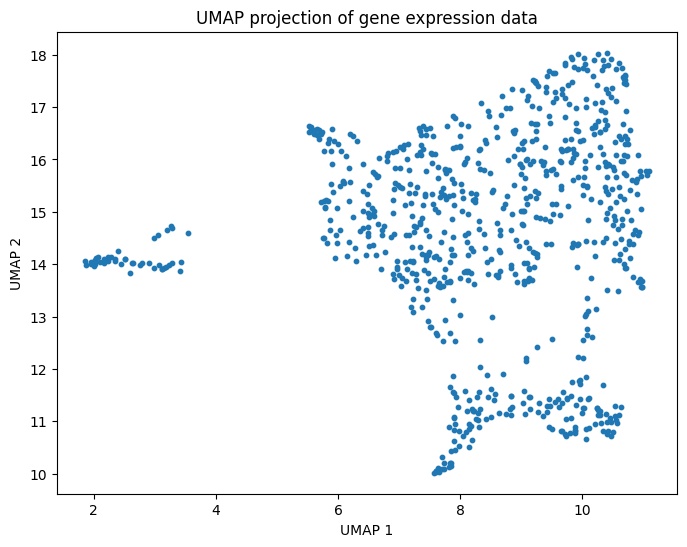

c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_28164\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


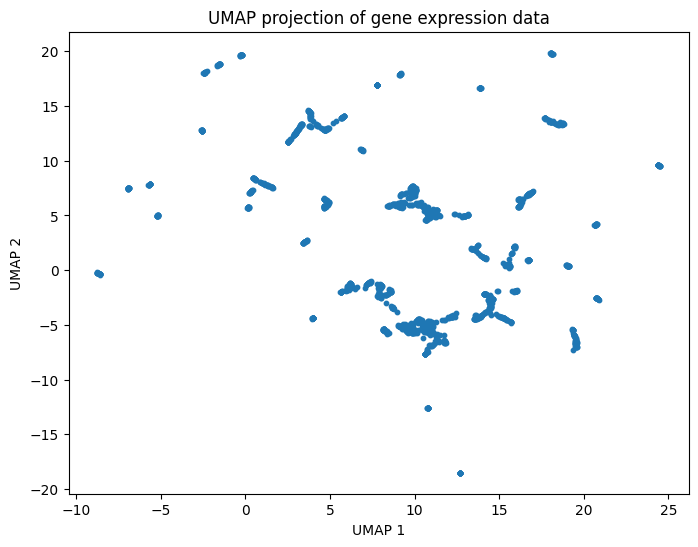

(None, None)

In [8]:
# original data exp and embedding after barlow_twins
umap_show(exp), umap_show(embedding)

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_28164\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


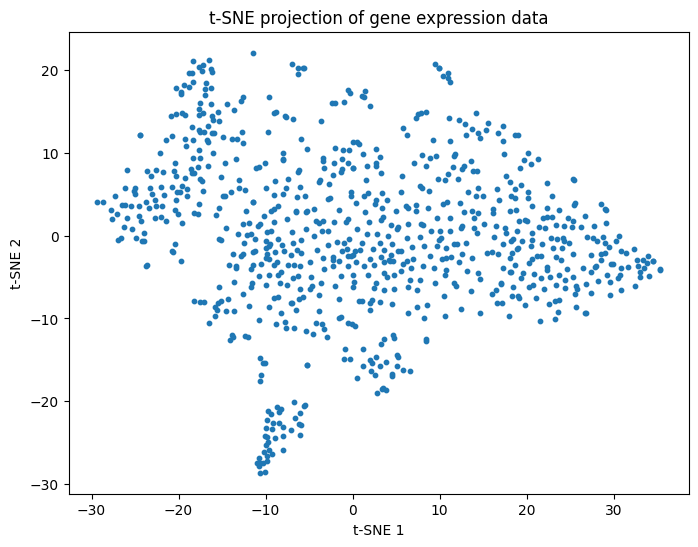

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_28164\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


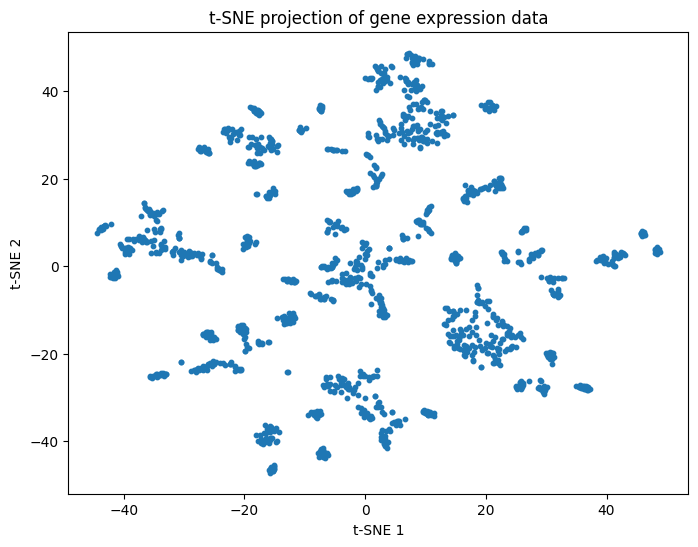

(None, None)

In [9]:
# original data exp and embedding after barlow_twins
tsne_show(exp), tsne_show(embedding)

[193.57723406 184.86350651 200.58014524 ... 213.27113486 215.97484203
 143.36289236]
[[ 273.          402.           81.30747972    2.        ]
 [  72.          745.           82.8263697     2.        ]
 [ 446.          600.           83.95754144    2.        ]
 ...
 [1614.         1617.          737.31579358  586.        ]
 [1615.         1618.          977.9967131   688.        ]
 [1613.         1619.         1147.35308232  811.        ]]


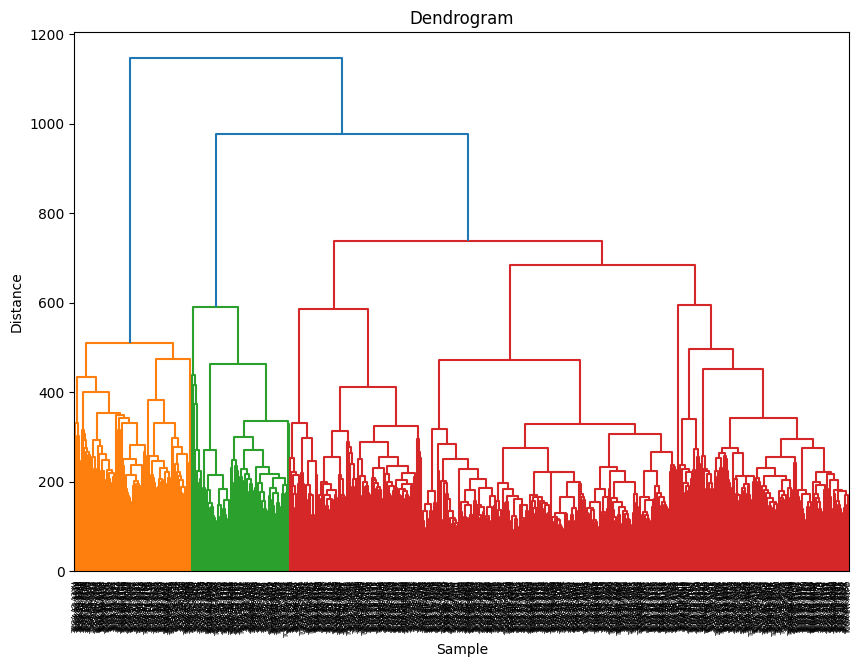

In [10]:
hierarchical_clustering(exp)

[11.92112426 17.96681819 16.50749683 ...  7.63919693 13.29762334
 12.23685529]
[[5.10000000e+01 1.35000000e+02 1.16778468e-01 2.00000000e+00]
 [1.20200000e+03 1.31600000e+03 1.16839920e-01 2.00000000e+00]
 [1.41000000e+02 4.02000000e+02 1.38994902e-01 2.00000000e+00]
 ...
 [2.90700000e+03 2.92700000e+03 1.08143679e+02 1.34600000e+03]
 [2.91700000e+03 2.92800000e+03 1.25018541e+02 1.44900000e+03]
 [2.88200000e+03 2.92900000e+03 1.58916087e+02 1.46600000e+03]]


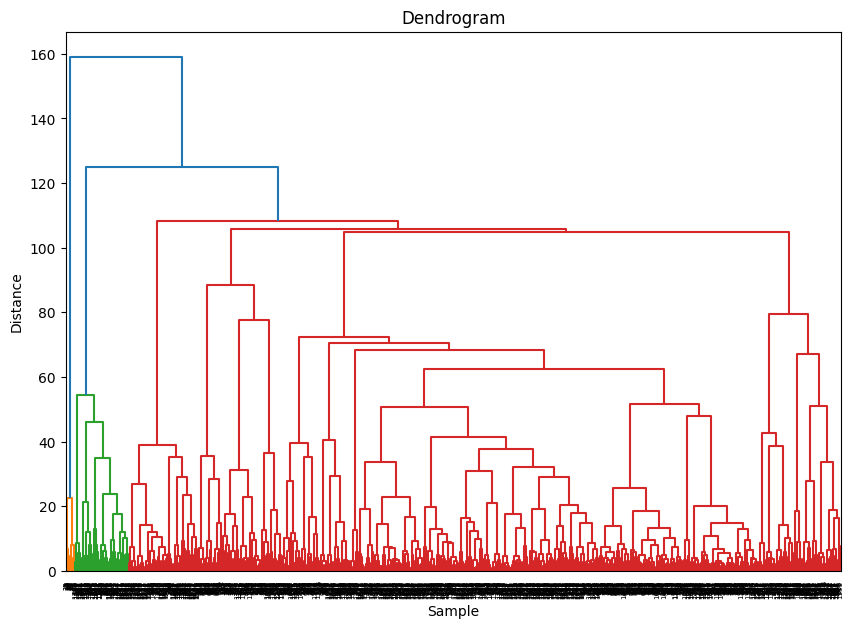

In [11]:
hierarchical_clustering(embedding)